In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

sys.path.append('../src')
from clean_df import *
from sort_lyrics_to_genre import *
from countvec import *

pd.options.display.max_rows = 200


## Choosing the right dataset

In [2]:
last20 = pd.read_csv('../data/weekly_billboardHot100_1999-2019.csv')
pd.set_option('display.max_colwidth', -1)

billboard_hot100 = clean_df(last20)

len(billboard_hot100)

97225

In [3]:
# large dataframe with detailed info: includes song names, genre, lyrics, artist. NO ATTRIBUTES

billboard_hot100.drop(['unnamed:_0','weekly.rank', 'peak.position', 'weeks.on.chart', 
                       'week', 'date', 'writing.credits', 'features' ], axis=1, inplace=True)
billboard_hot100.tail()

#Dataset to too complex. Too many words and too many multi genres

,artists,name,genre,lyrics
97220,Vitamin C,Smile,"Jamaica,Pop","Smile \nHahaha\nAlright, yeah\nAlright\nFirst of all...\nWhen you wake up in the evening and the day is shot\nFind yourself complaining about the things you ain't got\nNever goes just the way you want it to\nCliche of the day, c'est la vie"", that's just life\nIt ain't easy, it's so tough, it ain't easy\nWhatcha gonna do, say, whatcha gonna do\nPut a smile on your face\nMake the world a better place\nPut a smile on your face\nWhatcha gonna do, say, whatcha gonna do\nPut a smile on your face\nMake the world a better place\nPut a smile on your face\nWhatcha gonna do, say, whatcha gonna do\nAnd another thing\nYou can say that I'm a dreamer and you think it's uncool\nPreaching about the better life I learned in school\nBut you get what you give in this life that we live\nAnd all that you do will come back to you\nLife Life, it ain't easy\nIt's so tough, Life\nIt ain't easy\nWhatcha gonna do, say, whatcha gonna do\nPut a smile on your face\nMake the world a better place\nPut a smile on your face\nWhatcha gonna do, say, whatcha gonna do\nPut a smile on your face\nMake the world a better place\nPut a smile on your face\nWhatcha gonna do, say, whatcha gonna do\nYo\nWhen things isn't right, there's not need to fight-a\nFrom when you have life and everything nice-a\nLove all your elders, please be polite\nEven when you're hurting, don't forget to smile\nGive love to all nation, big or small\nWhen you do good, you'll get your reward\nUnited we stand, divided we fall\nPut a smile pon your face and greet one and all\nLife, it ain't easy, oh it's so tough, it ain't easy\nWhatcha gonna do, say, whatcha gonna do\nPut a smile on your face\nMake the world a better place\nPut a smile on your face\nWhatcha gonna do, say, whatcha gonna do\nPut a smile on your face alright\nMake the world a better place\nPut a smile on your face\nWhatcha gonna do, say, whatcha gonna do\nPut a smile on your face oh yeah\nMake the world a better place\nPut a smile on your face\nWhatcha gonna do, say, whatcha gonna do\nPut a smile on your face c'mon smile!\nMake the world a better place\nPut a smile on your face oh yeah\nWhatcha gonna do, say, whatcha gonna do\nPeople love you when you smile\nAnd hate you when you screw\nLots of happiness, rasta knows, we are wishing you\nYou coulda come from Jamaica or Honolulu, aye\nKeep a smile on your face and see the good that you do\nWha' me say you fi do?!\nSmile smile, and everything will be fine\nYou done know a the vibes smile it gives me inside\nLove it when you smile, you look beautiful like that\nCome again from top, haha\nYour dimples are so cute, hahaha\nI love the happiness, zeen!\nSmile\n"
97221,Collective Soul,Heavy,"Hockey,Gaming,Soundtrack,Rock",Heavy \nComplicate this world you wrapped for me\nI'm acquainted with your suffering\nAll your weight it falls on me\nIt brings me down\nAll your weight it falls on me\nIt falls on me\nHold me up to those whom you've deceived\nPromises you break you still believe\nAll your weight it falls on me\nIt brings me down\nAll your weight it brings me down\nIt brings me down\nAll your weight it falls on me\nIt brings me down\nAll your weight it falls on me\nIt falls on me\nAll your weight it falls on me\nIt brings me down\nAll your weight it falls on me\nIt falls on me\n
97222,Mary Chapin Carpenter,Almost Home,"Country,Pop",Almost Home \nI saw my life this morning\nLying at the bottom of a drawer\nAll this stuff I'm saving\nGod knows what this junk is for\nAnd whatever I believed in\nThis is all I have to show\nWhat the hell were all reasons\nFor holding on for such dear life\nHere's where I let go\nI'm not running\nI'm not hiding\nI'm not reaching\nI'm just resting in the arms of the great wide open\nGonna pull my soul in\nAnd I'm almost home\nI saw you this morning\nYou were staring back at me\nFrom an ancient photograph\nStuck between some letters and some keys\nI was lost just for a moment\nIn the ache of old goodby

In [4]:
billboard_hot100.loc[last20['name']=='Gravity']

,artists,name,genre,lyrics
59609,John Mayer,Gravity,"Blues Rock,Rock","Gravity \nGravity is working against me\nAnd gravity wants to bring me down\nOh, I'll never know\nWhat makes this man, with all the love that his heart can stand\nDream of ways to throw it all away\nWoah, woah\nGravity is working against me\nAnd gravity wants to bring me down\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nWoah, woah\nGravity, stay the hell away from me\nWoah, woah\nGravity has taken better men than me\nNow, how can that be?\nJust keep me where the light is\nJust keep me where the light is\nJust keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where, now, keep me where the light is\n"
59700,John Mayer,Gravity,"Blues Rock,Rock","Gravity \nGravity is working against me\nAnd gravity wants to bring me down\nOh, I'll never know\nWhat makes this man, with all the love that his heart can stand\nDream of ways to throw it all away\nWoah, woah\nGravity is working against me\nAnd gravity wants to bring me down\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nWoah, woah\nGravity, stay the hell away from me\nWoah, woah\nGravity has taken better men than me\nNow, how can that be?\nJust keep me where the light is\nJust keep me where the light is\nJust keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where, now, keep me where the light is\n"
60515,John Mayer,Gravity,"Blues Rock,Rock","Gravity \nGravity is working against me\nAnd gravity wants to bring me down\nOh, I'll never know\nWhat makes this man, with all the love that his heart can stand\nDream of ways to throw it all away\nWoah, woah\nGravity is working against me\nAnd gravity wants to bring me down\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nWoah, woah\nGravity, stay the hell away from me\nWoah, woah\nGravity has taken better men than me\nNow, how can that be?\nJust keep me where the light is\nJust keep me where the light is\nJust keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where, now, keep me where the light is\n"
60578,John Mayer,Gravity,"Blues Rock,Rock","Gravity \nGravity is working against me\nAnd gravity wants to bring me down\nOh, I'll never know\nWhat makes this man, with all the love that his heart can stand\nDream of ways to throw it all away\nWoah, woah\nGravity is working against me\nAnd gravity wants to bring me down\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nWoah, woah\nGravity, stay the hell away from me\nWoah, woah\nGravity has taken better men than me\nNow, how can that be?\nJust keep me where the light is\nJust keep me where the light is\nJust keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where, now, keep me where the light is\n"


In [5]:
billboard_hot100.genre.unique().tolist()

['Country,Atlanta,Alternative Country,Hip-Hop,Trap,Memes,Remix,Country Rap,Rap',
 'Pop',
 'Hip-Hop,Dark Pop,House,Trap,Memes,Alternative Dance,Alternative,Alternative Pop,Dance-Pop,Dance,Electro-Pop,Electro,Pop',
 'Synth-Pop,Pop',
 'Canada,UK,Dance,Dance-Pop,Pop',
 'Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop',
 'Trap,East Coast,Rap',
 'Hip-Hop,Rap,Basketball,NBA,Canada',
 'Alternative R&;B,Hip-Hop,Rap,Pop,DMV,Canada,R&;B',
 'Memes,Hip-Hop,Trap,Rap',
 'Pop,Rap',
 'Rap,Disney,Hip-Hop,Marvel,Soundtrack,R&;B,Pop',
 'Synth-Pop,LGBTQ+,Pop',
 'Canada,Teen Pop,Pop',
 'UK,Pop',
 'Memes,Atlanta,Hip-Hop,Trap,Rap',
 'Synth-Pop,R&;B,Alternative Pop,Ballad,Pop,Alternative',
 'Country',
 'Trap,Rap',
 'East Coast,Hip-Hop,Rap',
 'Dance-Pop,Dance,Electronic Pop,Electro,R&;B,Electronic,Electro-Pop,UK,Pop',
 'Country,Atlanta,East Coast,Trap,Country Rap,Hip-Hop,Rap',
 'Memes,Trap,R&;B,Pop',
 'Pop-Rock,Jazz Fusion,Alternative,Alternative Pop,Electro-Pop,Pop',
 'Adult Alternative,Producer,Alternative Dan

In [6]:
len(billboard_hot100.genre.unique().tolist())

2364

In [7]:
at = pd.read_csv('../data/songAttributes_1999-2019.csv')

#Includes the attributes of songs, artist, song. EXPLUDES GENRE. Limites song choice dispite length

song_attributes = clean_df(at)
len(song_attributes)

154931

In [8]:
cols = ['name', 'artist', 'album', 'acousticness', 'danceability', 'duration','energy', 
        'explicit', 'instrumentalness' , 'liveness', 'loudness','mode',
        'popularity', 'speechiness', 'tempo', 'timesignature', 'valence']

song_attributes = song_attributes[cols]

song_attributes.loc[song_attributes['name']=='Why Georgia']

,name,artist,album,acousticness,danceability,duration,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,timesignature,valence
147710,Why Georgia,John Mayer,Room For Squares,0.0208,0.608,268973,0.639,False,0.000059,0.0893,-7.205,1,68,0.0246,96.915,4,0.369


In [10]:
pd.set_option('display.max_colwidth', -1)

# Detailed dataframe with artist's overall song attributes and genre. EXCLUDES LYRICS AND SONGS
gen = pd.read_csv('../data/genre_data/data_w_genres.csv')

cols = gen.columns.tolist()
cols =  cols[-1:] + cols[:-1]
gen = gen[cols]
gen = gen.sort_values(by=['genres','artists'])

gen.loc[gen['artists']=='Backstreet Boys'].iloc[0:1,:2]

,genres,artists
1953,"['boy band', 'dance pop', 'europop', 'pop']",Backstreet Boys


In [ ]:
len(gen)

In [ ]:
pd.set_option('display.max_colwidth', -1)
gen.loc[gen['artists'] == 'Alicia Keys']['genres']

In [11]:
# data and attributes for each genre

pd.set_option('display.max_colwidth', -1)
gen_gen = pd.read_csv('../data/genre_data/data_by_genres.csv')

rock_attribute = gen_gen.loc[gen_gen['genres'] == 'rock']
reggae_attribues = gen_gen.loc[gen_gen['genres'] == 'reggae']
country_attribues = gen_gen.loc[gen_gen['genres'] == 'country']
hiphop_attribute = gen_gen.loc[gen_gen['genres'] == 'hip hop']
pop_attribute = gen_gen.loc[gen_gen['genres'] == 'pop']
blues_attribute = gen_gen.loc[gen_gen['genres'] == 'blues']
jazz_attribute = gen_gen.loc[gen_gen['genres'] == 'jazz']


gen_attributes = pd.concat([rock_attribute, reggae_attribues, country_attribues, hiphop_attribute,
                     pop_attribute, blues_attribute, jazz_attribute]).reset_index().drop('index', axis=1)

gen_attributes

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,rock,0.161531,0.499537,246544.320281,0.706954,0.089548,0.210713,-8.128243,0.065495,124.663941,0.510041,43.972699,9,1
1,reggae,0.222922,0.747230,234544.812670,0.538065,0.077565,0.163380,-9.661541,0.132411,116.038205,0.743706,41.753523,7,1
2,country,0.305335,0.588753,214728.878827,0.601206,0.015089,0.174485,-8.360418,0.049372,122.592254,0.566862,44.695854,7,1
3,hip hop,0.165261,0.718704,246589.077134,0.664707,0.023867,0.214244,-7.562332,0.221819,111.720007,0.578925,49.573884,1,1
4,pop,0.263629,0.629311,219246.866256,0.618522,0.023895,0.171738,-6.866721,0.087476,119.870033,0.486683,59.691127,7,1
5,blues,0.586249,0.586408,229699.022335,0.448291,0.103853,0.196990,-11.789274,0.068264,117.997406,0.645884,28.297621,9,1
6,jazz,0.751593,0.505912,331072.141345,0.321045,0.374473,0.192582,-15.024195,0.059999,112.610828,0.483143,21.408293,5,1


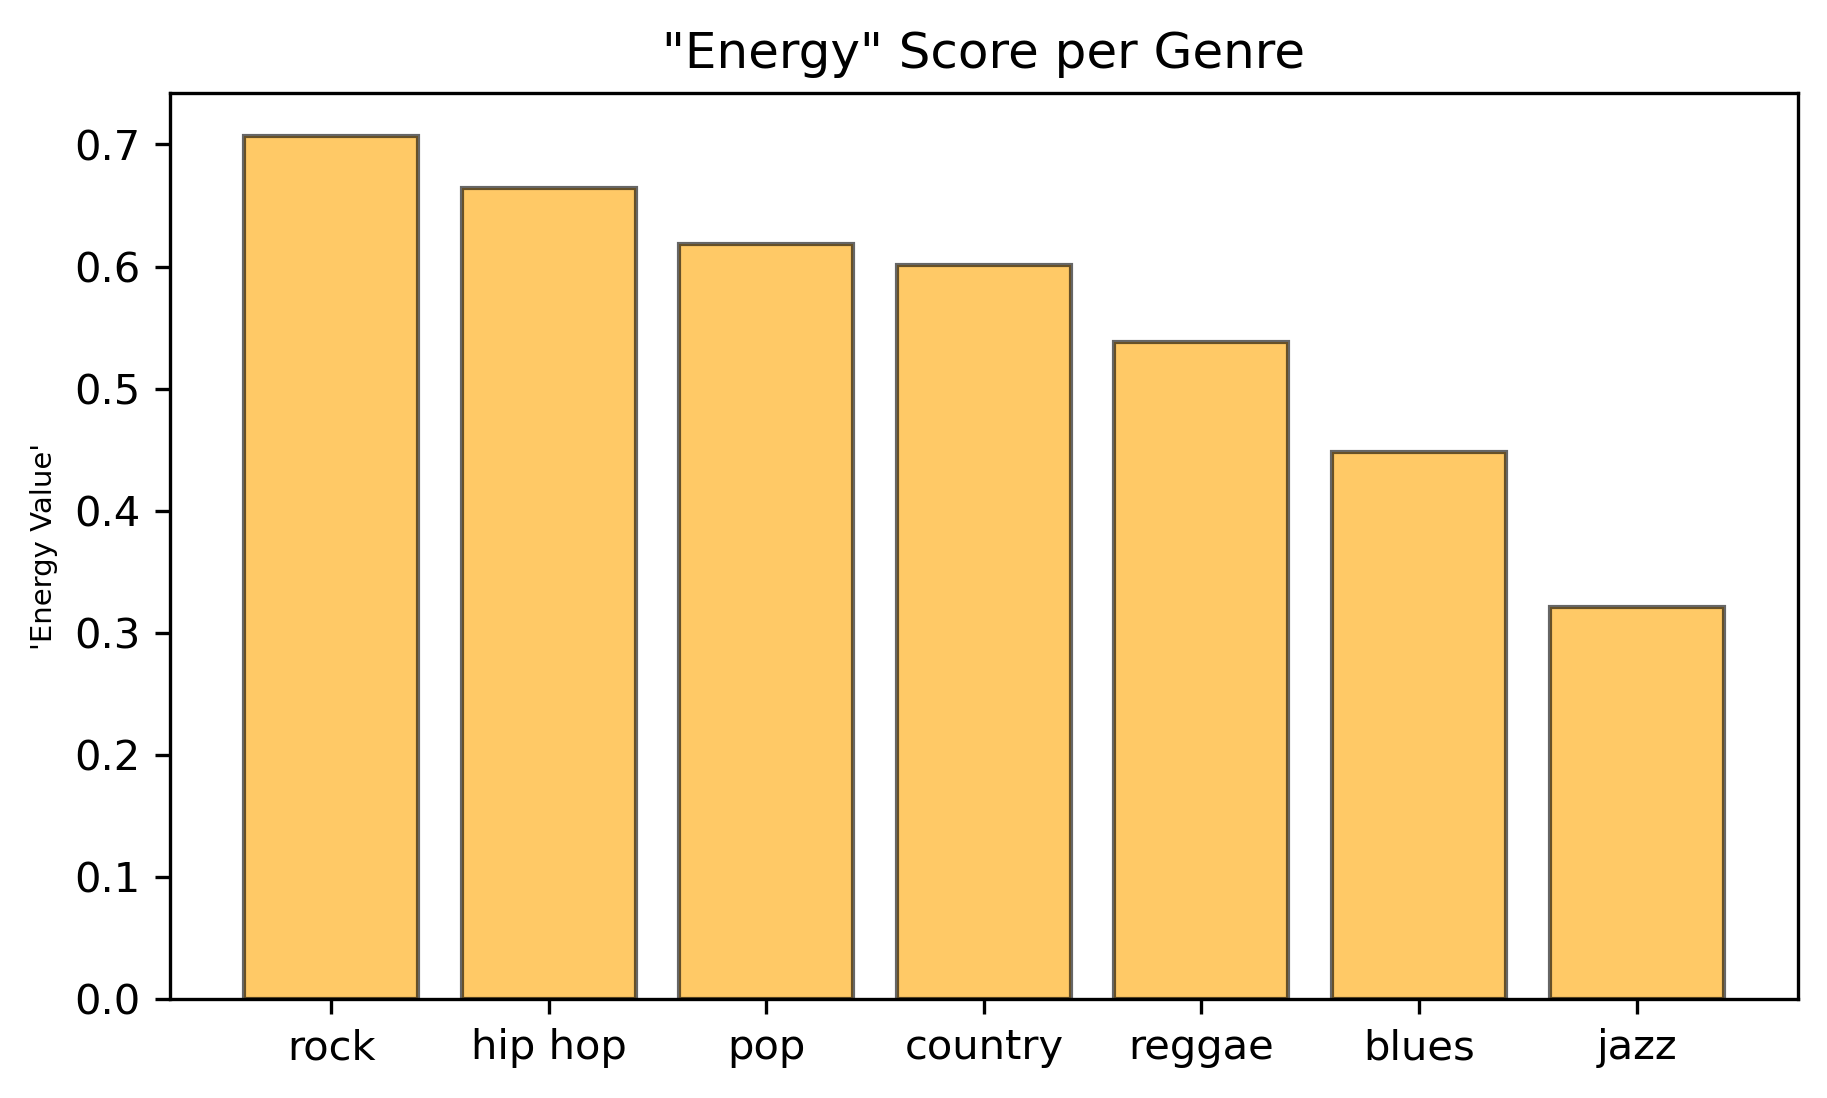

In [12]:
#plot how many songs in each genre

x = gen_attributes['genres'].to_numpy()
y = gen_attributes['energy'].to_numpy()

data = pd.DataFrame({'genre':x, 'energy':y}).sort_values('energy', ascending=False)

a = data['genre'].to_numpy()
b = data['energy'].to_numpy()

fig, ax = plt.subplots(figsize = (7,4), dpi=300)

ax.set_ylabel("'Energy Value'", fontsize=7)

ax.bar(a, b, color="orange", edgecolor='black', alpha=0.6)


plt.title('"Energy" Score per Genre')
plt.show();

# fig.savefig('../images/energypergen.png', format='png')

In [13]:
#list of all genres

list_genre = gen_gen.genres.unique().tolist()
list_genre[:20]

#Too many subgenres

['432hz',
 '[]',
 'a cappella',
 'abstract',
 'abstract beats',
 'abstract hip hop',
 'accordeon',
 'accordion',
 'acid house',
 'acid jazz',
 'acid rock',
 'acid trance',
 'acousmatic',
 'acoustic blues',
 'acoustic pop',
 'acoustic punk',
 'adoracion',
 'adult standards',
 'adventista',
 'afghan pop']

In [15]:
ly = pd.read_csv('../data/1950_2019_with lyrics.csv')
ly[900:950]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
900,2399,the righteous brothers,see that girl,1965,pop,girl look good eye prize sure look crazy smile believe somethin right feelin proud look believe blow slip away tell okay tear heart girl girl break slip away tell okay tear heart girl girl girl,35,0.001504,0.001504,0.001504,...,0.309723,0.050799,0.127044,0.535523,0.317268,0.000054,0.091096,0.209185,sadness,0.785714
901,2401,gary lewis & the playboys,dream lover,1965,pop,night pray dream lover come girl hold arm know magic charm cause want yeahyeah yeah girl yeahyeah yeah yeahyeah yeah yeahyeah want dream lover dream dream lover true hand hold feel near grow cause want yeahyeah yeah girl yeahyeah yeah yeahyeah yeah yeahyeah want dream lover dream someday know hear plea know bring dream lover sleep dream thing till lover dream come true cause want yeahyeah yeah girl yeahyeah yeah yeahyeah yeah yeahyeah want dream lover dream dream lover sleep dream thing till lover dream come true cause want yeahyeah yeah girl yeahyeah yeah yeahyeah yeah yeahyeah want dream lover dream dream dream wanna dream fade,106,0.039701,0.000591,0.000591,...,0.000591,0.000591,0.509369,0.677973,0.358433,0.000068,0.868096,0.529515,romantic,0.785714
902,2402,the beach boys,good to my baby (stereo),1965,pop,good baby good baby good baby good baby think treat mean know see know couple girl good baby girl good baby know good baby good baby guy think better know want sure friends know stay couple come girl good baby girl good baby know good baby good baby good baby good baby good baby good baby girl good baby girl good baby girl good baby girl good baby,68,0.364009,0.000774,0.000774,...,0.000774,0.307413,0.481209,0.717586,0.523092,0.000000,0.971146,0.821816,feelings,0.785714
903,2405,the supremes,whisper you love me boy,1965,pop,whisper word seldom pass whisper true long hold arm bring hear sweet things whisper sound soft dear tender whisper sweet things seldom hear hardly hold close whisper whisper whisper,29,0.002024,0.002024,0.002024,...,0.002024,0.002024,0.552691,0.754147,0.646586,0.000000,0.620775,0.579566,romantic,0.785714
904,2406,the beach boys,salt lake city (stereo),1965,pop,utah guy city call salt lake grooviest kid tire salt lake kid talk cool sight thing number radio station make swing yeah salt lake city come soon near city yeah kid lagoon kinds girls rid flyin soon girl girl cutest western state summer winter time ski great yeah salt lake city come soon salt lake city come soon come soon come soon come soon,64,0.079378,0.001170,0.001170,...,0.001170,0.001170,0.460630,0.691665,0.026907,0.000008,0.716612,0.732724,music,0.785714
905,2410,the byrds,eight miles high,1965,pop,high touch stranger know sign street go warmth afraid lose grind rain know sound place small face unbind round square huddle storm laugh shapeless form sidewalk scenes black limousines live stand,31,0.002392,0.357486,0.002392,...,0.002392,0.002392,0.321997,0.646002,0.213855,0.086538,0.352844,0.769763,violence,0.785714
906,2413,the miracles,all i want (is you),1965,pop,fall help fall helplessly fall fall mountains mountains highest mountain yeah swim ocean wide dare miracle happen time fall yeah forever forever fall need want thing want yeah fall,29,0.002193,0.002193,0.002193,...,0.379310,0.002193,0.421640,0.756378,0.735944,0.000019,0.554823,0.709701,sadness,0.785714
907,2421,donovan,the war drags on,1965,pop,tell story soldier name go fight good fight south vietnam go fight peace liberty go fight equality drag involve blood bone millions face home gun grow louder dust bone flesh long leave people leave home drag people free like bloodletting misery tear poor country know years drag night poor nightmare keep occur reoccurring dream cities people burn scream shoutin loud right head great orange mushroom cloud world tear come stream cry grind,7

In [16]:
ly.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [17]:
#nly useful columns
cols = gen.columns.tolist()
cols =  ['artist_name', 'track_name', 'genre', 'release_date', 'lyrics']
lyrics = ly[cols]
lyrics.head()

,artist_name,track_name,genre,release_date,lyrics
0,mukesh,mohabbat bhi jhoothi,pop,1950,hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel
1,frankie laine,i believe,pop,1950,believe drop rain fall grow believe darkest night candle glow believe go astray come believe believe believe smallest prayer hear believe great hear word time hear bear baby touch leaf believe believe believe lord heaven guide sin hide believe calvary die pierce believe death rise meet heaven loud amen know believe
2,johnnie ray,cry,pop,1950,sweetheart send letter goodbye secret feel better wake dream think real false emotions feel heartaches hang long blue get bluer song remember cloudy hair
3,pérez prado,patricia,pop,1950,kiss lips want stroll charm mambo chacha meringue heaven arm japan brag geisha care long uncle eye starry sort gleam like million dollar dream come true everybody wish steal heart away guess try eye starry sort gleam like million dollar dream come true kiss lips want stroll charm japan brag geisha care long uncle
4,giorgos papadopoulos,apopse eida oneiro,pop,1950,till darling till matter know till dream live apart know hearts till world free oceans cross mountains climb know gain loss pray loss time till dream till memory till hold till oceans cross mountains climb know gain loss pray loss time till dream till memory till hold till


In [18]:
genre = lyrics.genre.unique()
genre

array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

In [19]:
bb=lyrics.loc[lyrics['artist_name'] == 'backstreet boys'].head(1)


In [20]:
#subsets per genre
hiphop = sort_by_genre(lyrics, 'hip hop')
rock = sort_by_genre(lyrics, 'rock')
country = sort_by_genre(lyrics, 'country')
blues = sort_by_genre(lyrics, 'blues')
jazz = sort_by_genre(lyrics, 'jazz')
reggae = sort_by_genre(lyrics, 'reggae')
pop = sort_by_genre(lyrics, 'pop')
pop.head()

,artist_name,track_name,genre,release_date,lyrics
0,mukesh,mohabbat bhi jhoothi,pop,1950,hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel
1,frankie laine,i believe,pop,1950,believe drop rain fall grow believe darkest night candle glow believe go astray come believe believe believe smallest prayer hear believe great hear word time hear bear baby touch leaf believe believe believe lord heaven guide sin hide believe calvary die pierce believe death rise meet heaven loud amen know believe
2,johnnie ray,cry,pop,1950,sweetheart send letter goodbye secret feel better wake dream think real false emotions feel heartaches hang long blue get bluer song remember cloudy hair
3,pérez prado,patricia,pop,1950,kiss lips want stroll charm mambo chacha meringue heaven arm japan brag geisha care long uncle eye starry sort gleam like million dollar dream come true everybody wish steal heart away guess try eye starry sort gleam like million dollar dream come true kiss lips want stroll charm japan brag geisha care long uncle
4,giorgos papadopoulos,apopse eida oneiro,pop,1950,till darling till matter know till dream live apart know hearts till world free oceans cross mountains climb know gain loss pray loss time till dream till memory till hold till oceans cross mountains climb know gain loss pray loss time till dream till memory till hold till


In [21]:
hiphopwords= " ".join(hiphop['lyrics'])
rockwords= " ".join(rock['lyrics'])
blueswords= " ".join(blues['lyrics'])
countrywords= " ".join(country['lyrics'])
reggaewords= " ".join(reggae['lyrics'])
popwords= " ".join(pop['lyrics'])
jazzwords= " ".join(jazz['lyrics'])

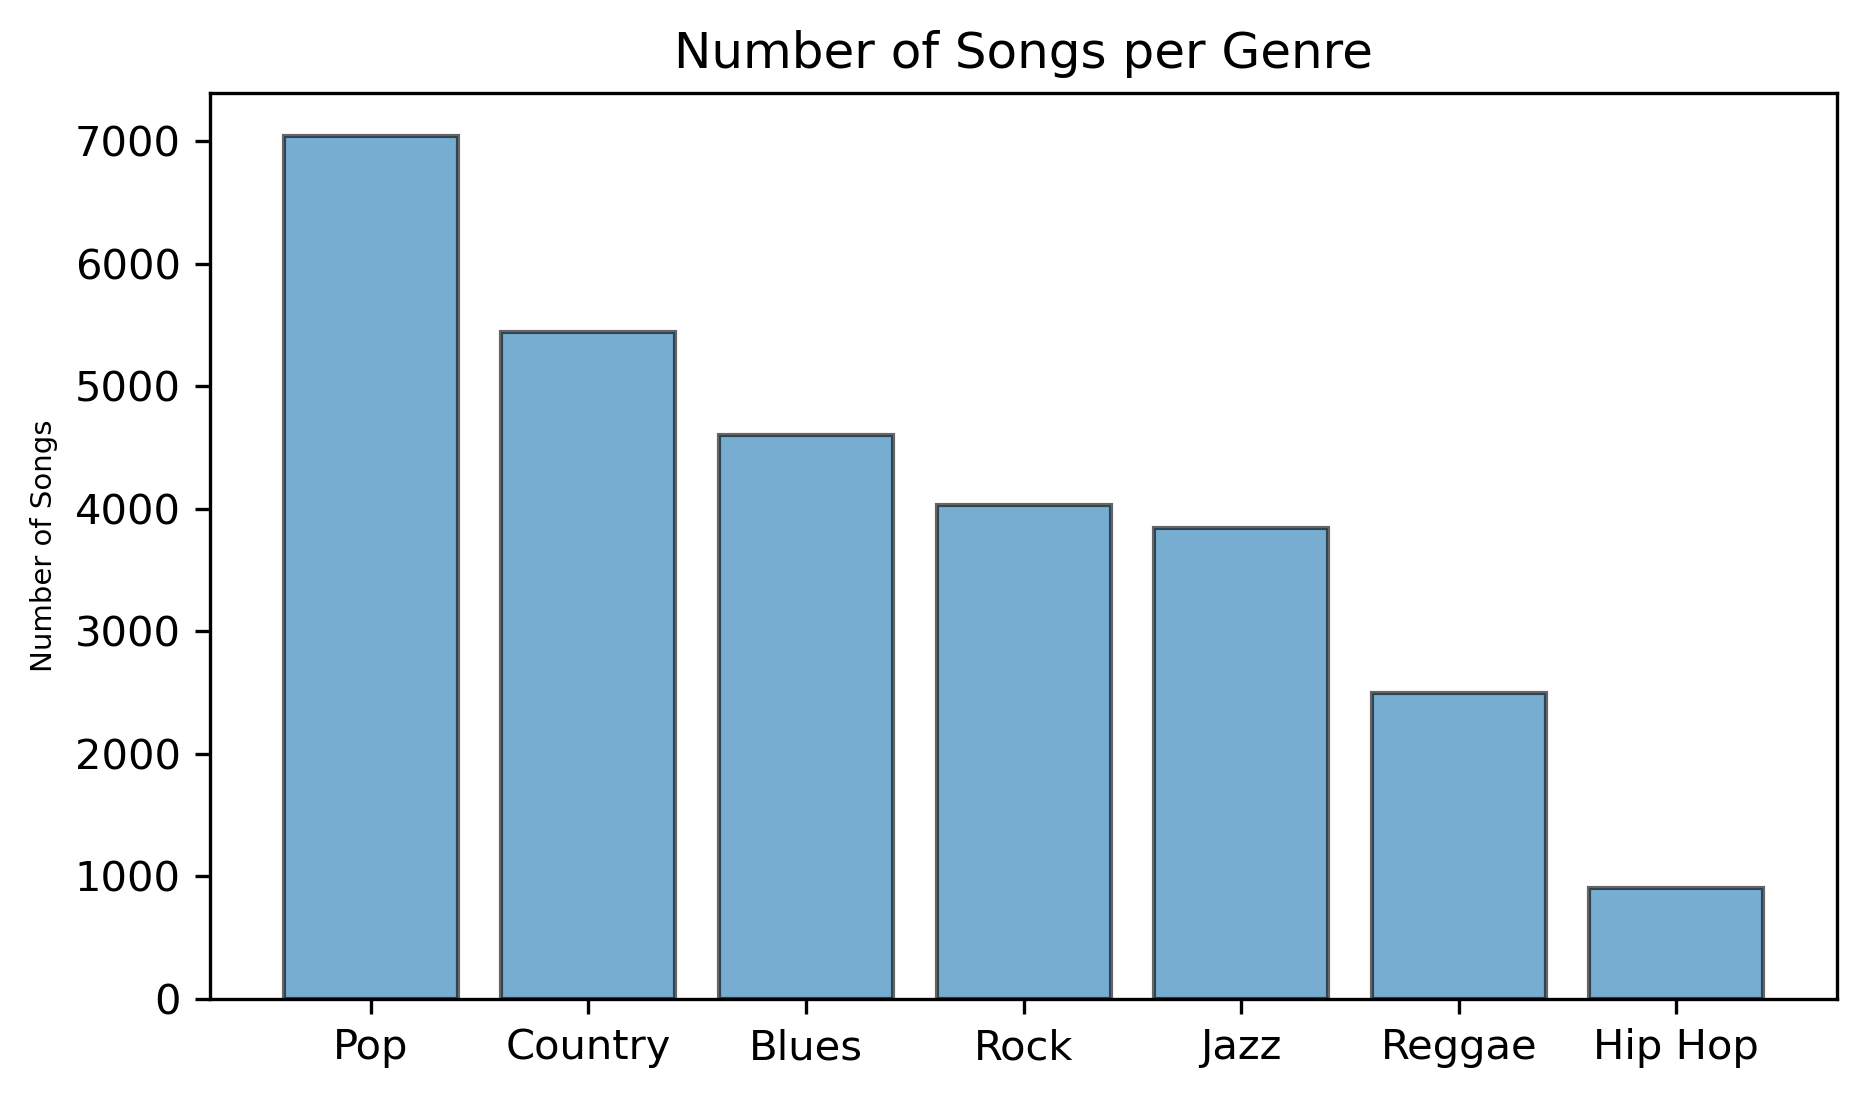

In [23]:
#plot how many songs in each genre

x = ['Hip Hop', 'Rock', 'Blues', 'Country', 'Reggae', 'Pop', 'Jazz']
y = [len(hiphop), len(rock), len(blues), len(country), len(reggae), len(pop), len(jazz)]

data = pd.DataFrame({'genre':x, '#_of_songs':y}).sort_values('#_of_songs', ascending=False)

a = data['genre'].values
b = data['#_of_songs'].values

fig, ax = plt.subplots(figsize = (7,4), dpi=300)

ax.set_ylabel("Number of Songs", fontsize=7)

ax.bar(a, b, edgecolor = 'black', alpha= 0.6)


plt.title('Number of Songs per Genre')
plt.show();

# fig.savefig('images/songspergen.png', format='png')

In [24]:
len(popwords)

3390355

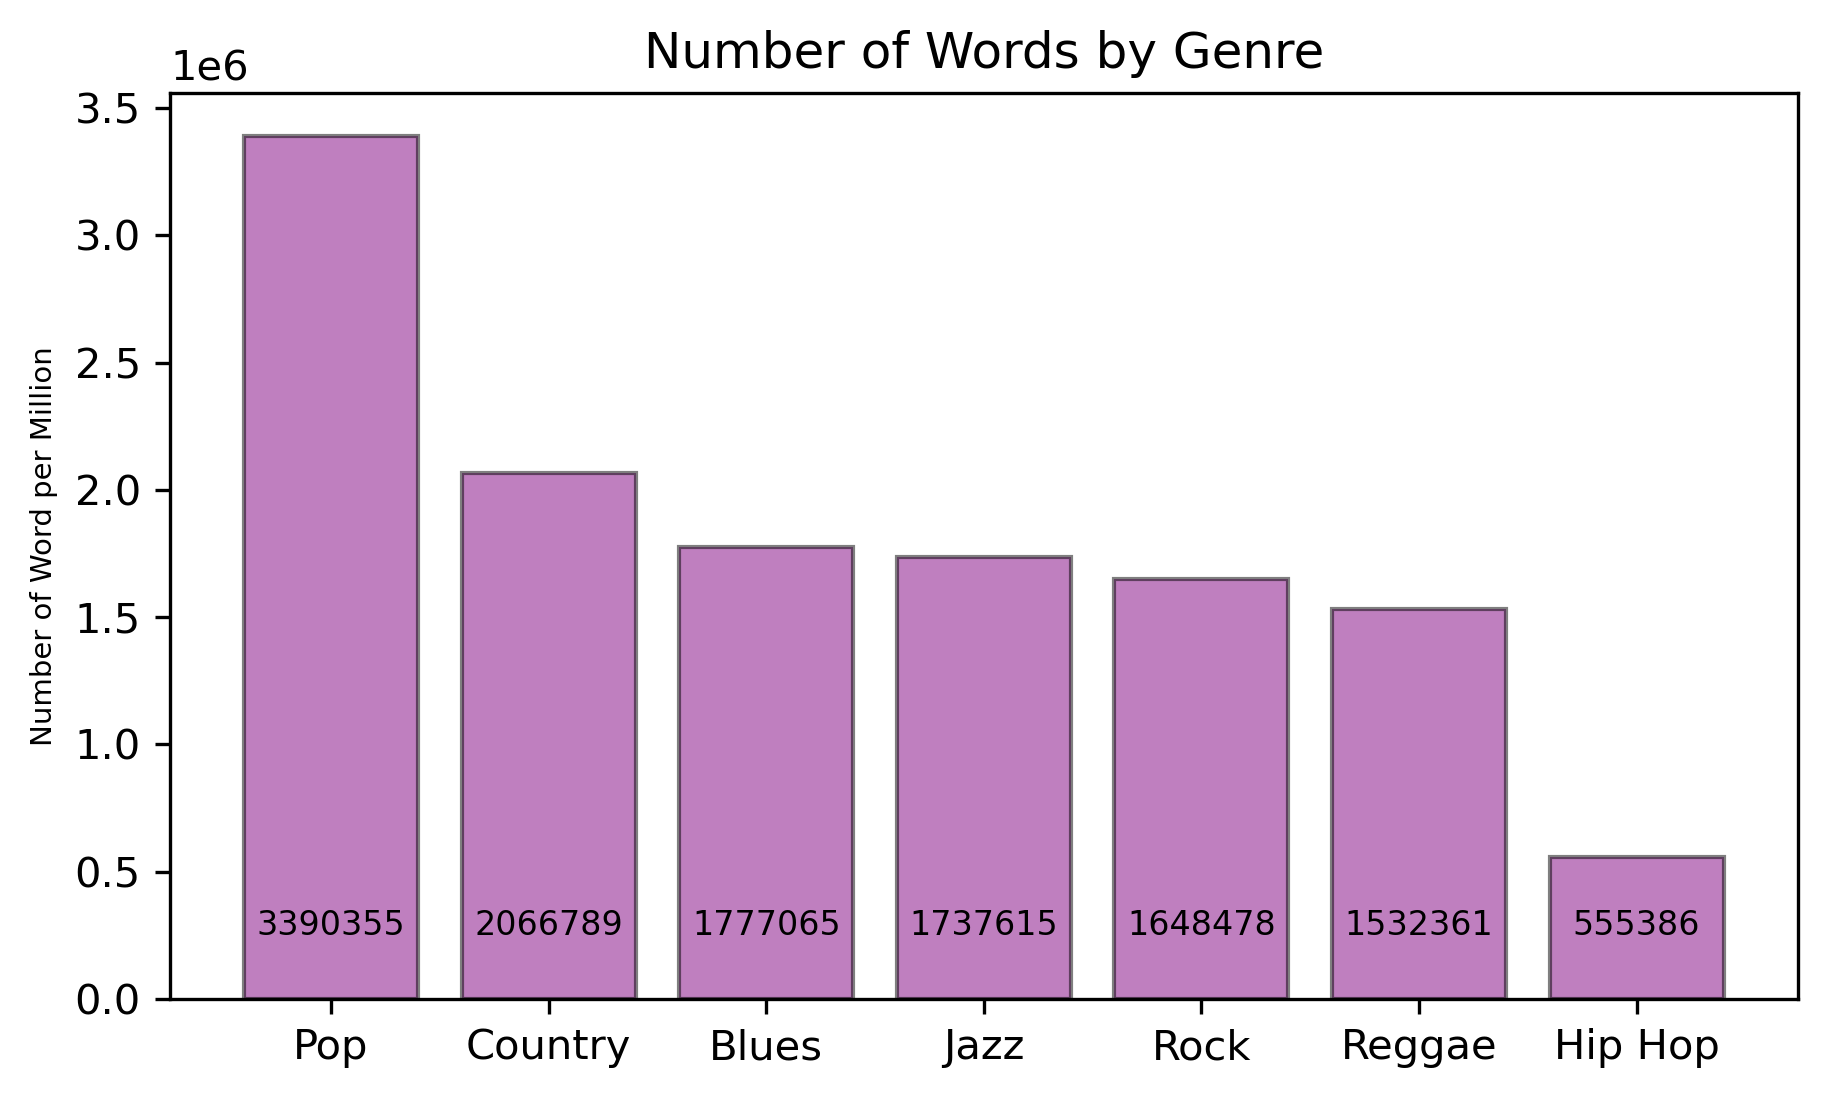

In [25]:
#plot how many songs in each genre
from matplotlib.ticker import FormatStrFormatter

x = ['Hip Hop', 'Rock', 'Blues', 'Country', 'Reggae', 'Pop', 'Jazz']
y = [len(hiphopwords), len(rockwords), len(blueswords), len(countrywords), len(reggaewords),
     len(popwords), len(jazzwords)]

data = pd.DataFrame({'genre':x, '#_of_words':y}).sort_values('#_of_words', ascending=False)

a = data['genre'].values
b = data['#_of_words'].values

fig, ax = plt.subplots(figsize = (7,4), dpi=300)

ax.bar(a, b, color='purple', edgecolor = 'black', alpha= 0.5)

ax.set_ylabel("Number of Word per Million", fontsize=7)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.title('Number of Words by Genre')

total = sorted(y, reverse=True)
for i, v in enumerate(total):
    ax.text(i, 
              v/total[i]+(2.5*100000), 
              total[i], 
              fontsize=8, 
              color='black', horizontalalignment='center')
    
plt.show();
fig.savefig('../images/wordspergen.png', format='png')

In [26]:
data.reset_index().drop('index', axis=1)

,genre,#_of_words
0,Pop,3390355
1,Country,2066789
2,Blues,1777065
3,Jazz,1737615
4,Rock,1648478
5,Reggae,1532361
6,Hip Hop,555386


## Count Vectorizer top 500

In [27]:
#Panda dataset Genre: all words in all lyrics
rock_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'rock'), 'rock')
hiphop_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'hip hop'), 'hip hop')
pop_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'pop'), 'pop')
reggae_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'reggae'), 'reggae')
jazz_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'jazz'), 'jazz')
country_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'country'), 'country')
blues_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'blues'), 'blues')

#Panda dataset Genre: top_500_words in all lyrics
top_20_rock = top_500_features(countvec(rock_lyrics), count_vectorizer)
top_20_hiphop = top_500_features(countvec(hiphop_lyrics), count_vectorizer)
top_20_pop = top_500_features(countvec(pop_lyrics), count_vectorizer)
top_20_reggae = top_500_features(countvec(reggae_lyrics), count_vectorizer)
top_20_jazz = top_500_features(countvec(jazz_lyrics), count_vectorizer)
top_20_country = top_500_features(countvec(country_lyrics), count_vectorizer)
top_20_blues = top_500_features(countvec(blues_lyrics), count_vectorizer)

In [28]:
top_500 = pd.DataFrame({'genre':[col.lower().replace(' ', '_') for col in x], 
                       'top_500_words':[top_20_hiphop, top_20_rock, top_20_blues, 
                                       top_20_country, top_20_reggae, top_20_pop, top_20_jazz]})
top_500

,genre,top_500_words
0,hip_hop,"{fuck, shit, bitch, lyric, commercial, tell, wanna, think, want, life, feel, need, money, look, real, leave, live, play, break, head, gotta, hear, game, stop, better, hand, turn, world, good, mind, start, talk, party, bout, away, hard, beat, drop, rhyme, girl, little, watch, bring, fight, black, people, check, stay, face, word, smoke, work, light, long, mean, walk, night, kick, stand, eye, damn, roll, high, gettin, flow, best, kill, dope, home, drink, step, ride, fuckin, block, throw, try, fall, lose, listen, believe, body, hell, everybody, club, hoe, streets, style, blow, sound, shoot, young, catch, place, straight, heart, comin, hood, ready, pull, inside, goin, lookin, tryna, bust, hate, hiphop, touch, girls, grind, shake, change, tryin, talkin, till, forget, street, things, remember, grow, music, days, write, somethin, cold, dead, make, track, sell, white, sayin, funky, nothin, blood, sing, pussy, pass, city, crew, open, tear, dream, line, trust, crazy, song, record, dance, spot, stick, rest, bang, house, brain, fast, true, soul, save, ring, respect, speak, school, fake, spit, pay, flip, bling, fool, burn, weed, cash, fresh, breathe, chain, miss, wrong, sleep, close, mouth, death, jump, blind, devil, round, care, livin, deal, hurt, doin, maybe, rap, rappers, ghetto, pain, nice, fear, thug, free, suck, deep, follow, york, feet, apart, wasn, gangster, sick, somebody, wall, homie, fade, scar, blue, hang, friends, pimp, lord, sure, holla, happen, hook, brothers, drug, quick, plus, whip, south, crack, paper, doubt, trap, picture, heat, push, strong, wild, cool, mama, gold, master, feelin, stack, slow, rain, lead, phone, door, kid, floor, point, blunt, lie, wait, outta, makin, years, yiggy, crowd, guess, truth, tonight, boys, peace, matter, pick, control, raise, boss, freak, runnin, reason, ghost, begin, shine, die, alive, fact, ladies, pound, send, type, kiss, clap, smooth, twist, number, grab, coast, build, bear, rockin, motherfucker, dame, lock, bottle, rule, cop, forever, finger, wear, understand, neck, rock, weak, pimpin, ball, knock, wish, friend, late, playin, murder, spend, ways, dirty, sweat, chill, dough, brother, half, scream, power, pack, funk, brand, tire, plan, dont, dark, repeat, morning, kind, sign, clear, soldier, learn, beef, pump, quit, bass, thats, thank, couldn, different, piece, thang, meet, stage, couple, daddy, breath, oooh, pocket, dust, green, rapper, thinkin, east, past, ridin, mother, shut, pop, drive, book, bleed, momma, train, child, switch, middle, women, alright, bite, homies, bigger, probably, problem, smokin, tight, takin, super, ones, slip, question, motherfuckers, motherfuckin, figure, voice, gun, star, kinda, thousand, help, today, run, original, coke, mess, buy, okay, choose, shoe, everyday, diamonds, claim, haters, chop, room, freeze, clip, wreck, wonder, corner, hit, teach, let, dumb, minute, dollar, lean, thugs, laugh, land, funny, radio, band, double, mistake, read, gang, nose, gangsta, wack, easy, count, wouldn, test, shawty, family, dawg, project, great, cost, knees, blame, stuff, cock, pretty, store, album, chick, slide, waitin, road, shame, poppin, boom, moment, madness, ask, glass, waste, rise, steady, fee, dude, hide, note, future, sittin, represent, zone, week, clean, class, smile, motherfucking, steal, smack, serve, microphone, end, hardcore, short, business, skin, love, clothe, loud, peep, team, second, large, wull, sight, wheel, swear, fame, promise, water}"
1,rock,"{away, feel, life, live, want, heart, leave, night, break, world, think, need, fall, look, tell, eye, long, mind, hear, head, inside, hand, good, dream, lose, stand, fuck, believe, face, change, better, turn, tonight, home, walk, stay, little, wanna, dead, kill, fight, sing, things, word, wait, light, play, place, lyric, commercial, remember, tear, cold, burn, bring, black, hell, pain, hard, hide, watch, start, line, lie, save, shoot, love, blood, soul, death, try, money, make, gotta, 

## Tf Idf Vectorizer top 20

In [29]:
target_names = ['rock', 'hiphop', 'pop', 'reggae', 'jazz', 'country', 'blues']

td = pd.concat([rock_lyrics, hiphop_lyrics,pop_lyrics,reggae_lyrics,jazz_lyrics,
                country_lyrics,blues_lyrics], axis=0)

top = tfidf_top_features(tfidf(td), 20)

top_20 = pd.DataFrame({'genre':target_names, 
                       'top_20_words': top})

td.shape

(7, 2)

In [30]:
target_names = ['rock', 'hiphop', 'pop', 'reggae', 'jazz', 'country', 'blues']

my_stop_words = my_stop_words.union(['feel','away','heart','right','live', 
                                     'long','life', 'want', 'leave','night', 'eye'])
tfidf_vectorizer = TfidfVectorizer(stop_words=my_stop_words, max_features=7000)

def tfidf(df, text = 'lyrics'):

    X = tfidf_vectorizer.fit_transform(df[text])

    return X

def tfidf_top_features(X, num):
    
    features = tfidf_vectorizer.get_feature_names()
    top_10_words = X.toarray().argsort()[:,-1:-(num+1):-1]

    f = []

    for num, word in enumerate(top_10_words):
        f.append({', '.join(features[i] for i in word)})
    return f

top = tfidf_top_features(tfidf(td), 20)

top_20 = pd.DataFrame({'genre':target_names, 
                       'top_20_words': top})

top_20

,genre,top_20_words
0,rock,"{break, world, think, need, fall, look, tell, mind, hear, head, inside, hand, good, dream, lose, stand, fuck, believe, face, change}"
1,hiphop,"{fuck, shit, bitch, lyric, commercial, tell, wanna, think, need, money, look, real, play, break, gotta, head, hear, game, stop, better}"
2,pop,"{think, tell, need, fall, world, wanna, look, break, good, girl, hear, dream, mind, stay, home, hand, better, fuck, walk, little}"
3,reggae,"{tell, world, good, fuck, need, look, people, mind, think, wanna, hear, stand, fight, black, play, shit, money, girl, hand, fall}"
4,jazz,"{world, dream, fall, think, need, tell, hear, mind, good, break, fuck, look, play, sing, hand, stay, wanna, little, lose, change}"
5,country,"{break, think, tell, good, home, dream, look, hear, world, fall, blue, mind, little, need, hand, walk, sing, lose, play, love}"
6,blues,"{tell, good, look, blue, home, hear, mind, think, break, world, need, hand, little, woman, fall, head, stand, change, lose, turn}"


### WordCloud

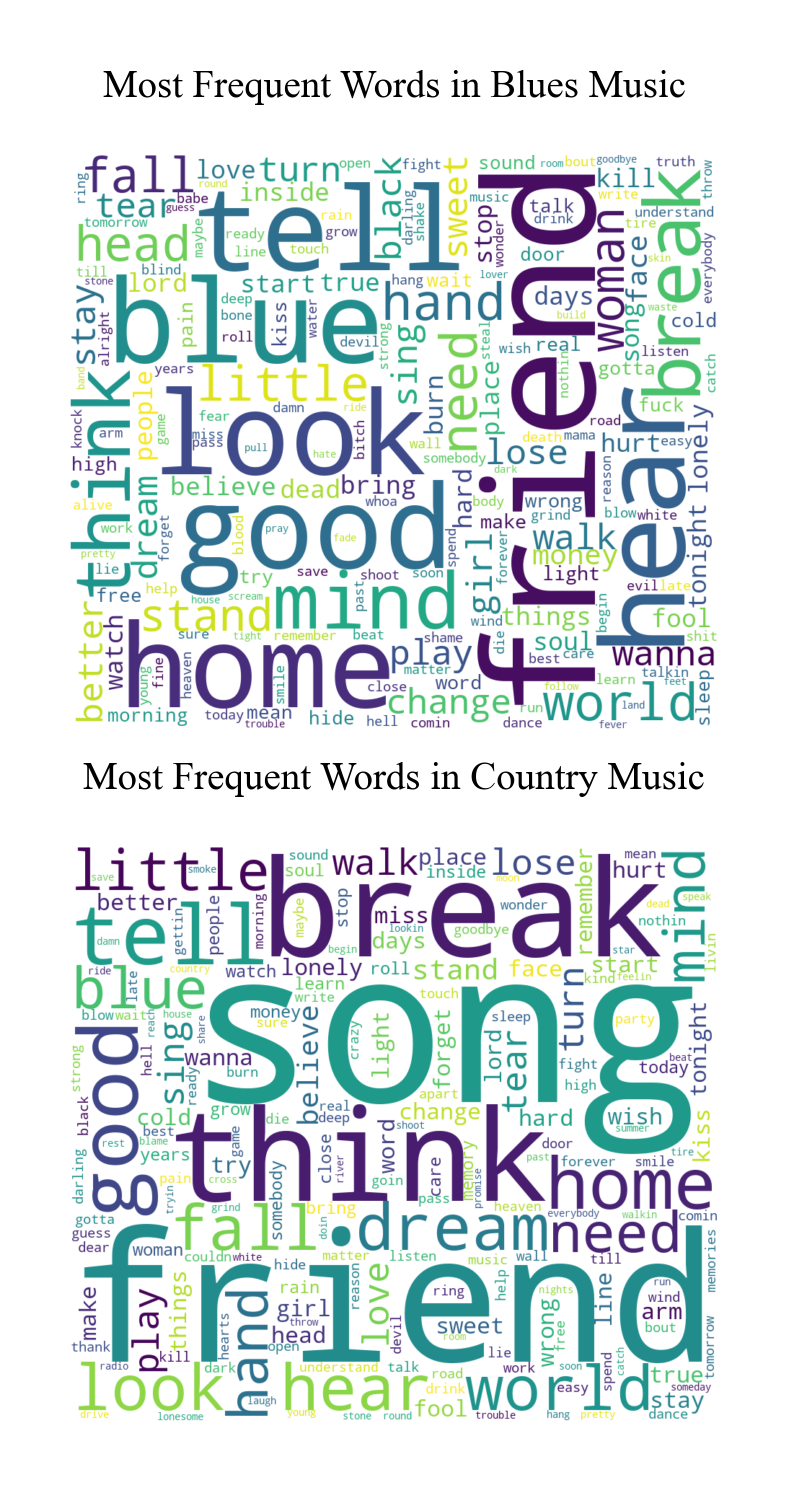

In [42]:
top_200_tfidf = tfidf_top_features(tfidf(td), 200)

top_200 = pd.DataFrame({'genre':target_names, 
                       'top_200_words': top_200_tfidf})


from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(
    background_color='white',
    max_words=2000, height=800, width=900)

word_cloud = top_200['top_200_words'][6]
string = ""
word_cloud_country = (' ').join(word_cloud)
wc.generate(word_cloud_country)

wc2 = WordCloud(
    background_color='white',
    max_words=2000, height=800, width=900)

word_cloud = top_200['top_200_words'][5]
string = ""
word_cloud_country = (' ').join(word_cloud)
wc2.generate(word_cloud_country)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(1.7,2.4), dpi=700)

ax1.imshow(wc, interpolation='bilinear')
ax1.set_title('Most Frequent Words in Blues Music',fontname='Times New Roman', fontsize=4)

ax2.imshow(wc2, interpolation='bilinear')
ax2.set_title("Most Frequent Words in Country Music", fontname='Times New Roman', fontsize=4)

ax1.axis('off')
ax2.axis('off')
plt.show();

fig.savefig('../images/word_cloud.png')


In [34]:
b = top_200['top_200_words'][6]#blues
b = " ".join(b)
c = top_200['top_200_words'][5]#country
c = " ".join(c)

In [35]:
import spacy

col = ['token', 'pos']
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words |= {my_stop_words}

nlp.max_length = 2000000
doc = nlp(b)
doc2=nlp(c)

val = []
for token in doc:
    val.append([token.lemma_, token.pos_])

val2 = []
for token in doc2:
    val2.append([token.lemma_, token.pos_])
    
blues_spacy = pd.DataFrame(val, columns = col)
country_spacy = pd.DataFrame(val2, columns = col)


blues_noun = blues_spacy.loc[blues_spacy['pos']=='NOUN']
blues_verb = blues_spacy.loc[blues_spacy['pos']=='VERB']

country_noun = country_spacy.loc[country_spacy['pos']=='NOUN']

print(country_noun.head(10), '\n', blues_noun.head(10))

    token   pos
8   home   NOUN
10  dream  NOUN
16  world  NOUN
22  mind   NOUN
36  play   NOUN
38  love   NOUN
40  tear   NOUN
42  song   NOUN
54  girl   NOUN
60  thing  NOUN 
     token   pos
8   home   NOUN
16  break  NOUN
18  world  NOUN
26  woman  NOUN
30  head   NOUN
42  walk   NOUN
46  play   NOUN
48  dream  NOUN
50  girl   NOUN
62  money  NOUN


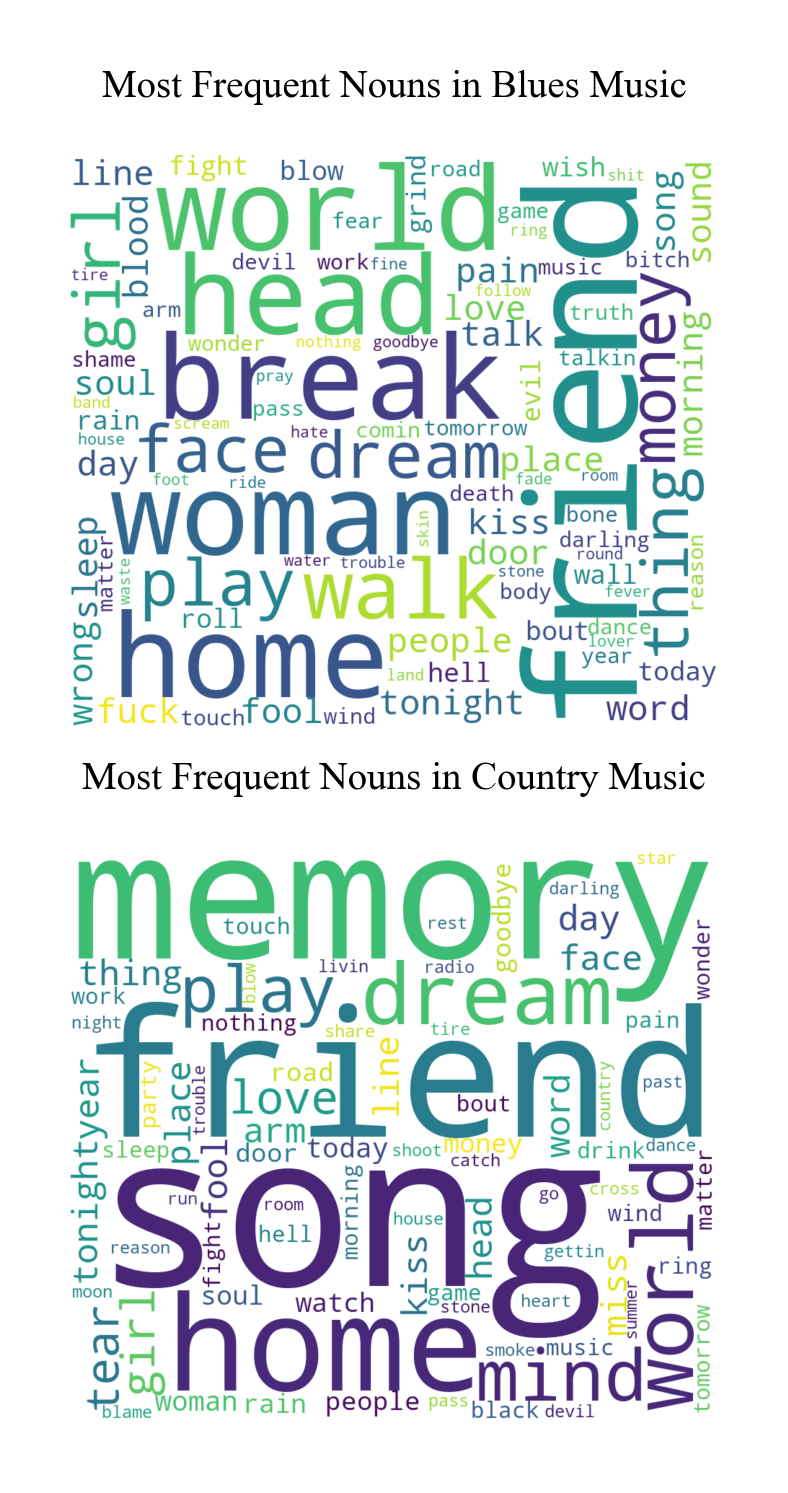

In [40]:
wc = WordCloud(
    background_color='white',
    max_words=2000, height=800, width=900)

word_cloud = blues_noun['token']
string = ""
word_cloud_blues = (' ').join(word_cloud)
wc.generate(word_cloud_blues)

wc2 = WordCloud(
    background_color='white',
    max_words=2000, height=800, width=900)

word_cloud = country_noun['token']
string = ""
word_cloud_country = (' ').join(word_cloud)
wc2.generate(word_cloud_country)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(1.7,2.4), dpi=700)

ax1.imshow(wc, interpolation='bilinear')
ax1.set_title('Most Frequent Nouns in Blues Music',fontname='Times New Roman', fontsize=4)

ax2.imshow(wc2, interpolation='bilinear')
ax2.set_title("Most Frequent Nouns in Country Music", fontname='Times New Roman', fontsize=4)

ax1.axis('off')
ax2.axis('off')
plt.show();

fig.savefig('../images/noun_cloud.png')

## Creating Naive Bayes Prediction


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score



genre_lyrics= lyrics.drop(['artist_name', 'track_name', 'release_date'], axis=1)
track_names = lyrics['track_name']
artist_names = lyrics['artist_name']

len(genre_lyrics)==len(artist_names)

### Applying Naive Bayes

In [ ]:
gentonum= {'pop':0, 'country':1, 'blues':2, 'jazz':3, 'reggae':4, 'rock':5, 'hip hop':6}
target_names = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']

X, y = countvec(genre_lyrics), genre_lyrics['genre']
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.25, random_state=0)

#Gaussian: The likelihood of the features is assumed to be Gaussian:
#Multinomial: multinomially distributed data, and is one of the two classic naive Bayes variants used in 
#       text classification (where the data are typically represented as word vector counts, although 
#       tf-idf vectors are also known to work well in practice).
#Complement: unbalanced data

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)

gnb_classif = classification_report(y_test, y_pred_gnb, target_names=target_names)
mnb_classif = classification_report(y_test, y_pred_mnb, target_names=target_names)
cnb_classif = classification_report(y_test, y_pred_cnb, target_names=target_names)

# print(f'Scores for Gaussian Naive Bayes:\n{(gnb_classif)}')
print(f'Scores for Multinomial Naive Bayes:\n {(mnb_classif)}')
# print(f'Scores for Complement Naive Bayes:\n {(cnb_classif)}')


In [ ]:
genre_lyrics.head()

In [ ]:
genre_lyrics.genre.unique()

### Model Tests Using Tf-Idf Vectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=7000)
def tfidf(df, text = 'lyrics'):
    X = tfidf_vectorizer.fit_transform(df[text])
    return X

X, y = tfidf(genre_lyrics), genre_lyrics['genre'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.25, random_state=0)

# gnb = GaussianNB()
# gnb.fit(X_train, y_train)
# y_pred_gnb = gnb.predict(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# cnb = ComplementNB()
# cnb.fit(X_train, y_train)
# y_pred_cnb = cnb.predict(X_test)

# gnb_classif = classification_report(y_test, y_pred_gnb, target_names=target_names)
mnb_classif = classification_report(y_test, y_pred_mnb, target_names=target_names)
# cnb_classif = classification_report(y_test, y_pred_cnb, target_names=target_names)

# print(f'Scores for Gaussian Naive Bayes:\n{(gnb_classif)}')
print(f'Scores for Multinomial Naive Bayes:\n {(mnb_classif)}')
# print(f'Scores for Complement Naive Bayes:\n {(cnb_classif)}')

In [ ]:
from sklearn.metrics import confusion_matrix
# gentonum= {'pop':0, 'country':1, 'blues':2, 'jazz':3, 'reggae':4, 'rock':5, 'hip hop':6}
c = confusion_matrix(y_test, y_pred_mnb)

confusion_matrix_full = pd.DataFrame(data=c, index=target_names, columns=target_names)
confusion_matrix_full

### Add stop words to Naive Bayes

In [ ]:
my_stop_words = my_stop_words.union(['feel','away','heart','right','live',                                    
                                     'long','life', 'want', 'leave','night', 'eye'
                                    'hold','gonna','year','baby',"say", "thing", "like","know",
                                    "get", "come", 'cause','time','yeah'])

tfidf_vectorizer = TfidfVectorizer(stop_words=my_stop_words, max_features=7000)
def tfidf(df, text = 'lyrics'):
    X = tfidf_vectorizer.fit_transform(df[text])
    return X

X, y = tfidf(genre_lyrics), genre_lyrics['genre']
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.25, random_state=0)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb_w_stopwords = mnb.predict(X_test)

mnb_classif = classification_report(y_test, y_pred_mnb_w_stopwords, target_names=target_names)
print(f'Scores for Multinomial Naive Bayes:\n {(mnb_classif)}')

In [ ]:
c1 = confusion_matrix(y_test, y_pred_mnb_w_stopwords)

confusion_matrix_stop = pd.DataFrame(data=c1, index=target_names, columns=target_names)
confusion_matrix_stop

In [ ]:
w = genre_lyrics['lyrics'].to_numpy()

col = ['token', 'pos']
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words |= {my_stop_words}

nlp.max_length = 2000000
doc = nlp(str(x for x in w))

val = []
for token in doc:
    val.append([token.lemma_, token.pos_])
    
full_spacy = pd.DataFrame(val, columns = col)

full_noun = full_spacy.loc[full_spacy['pos']=='NOUN']
full_verb = blues_spacy.loc[blues_spacy['pos']=='VERB']

## Final Model

In [ ]:
my_stop_words = my_stop_words.union(['feel','away','heart','right','live',                                    
                                     'long','life', 'want', 'leave','night', 'eye'
                                    'hold','gonna','year','baby',"say", "thing", "like","know",
                                    "get", "come", 'cause','time','yeah'])

tfidf_vectorizer = TfidfVectorizer( stop_words='english', max_features=3000, strip_accents='unicode', 
                                   ngram_range=(1,2), sublinear_tf=True
                                  )
def tfidf(df, text = 'lyrics'):
    X = tfidf_vectorizer.fit_transform(df[text])
    return X

X, y = tfidf(genre_lyrics), genre_lyrics['genre']
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.25, random_state=0)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb_w_highmax = mnb.predict(X_test)

mnb_classif = classification_report(y_test, y_pred_mnb_w_highmax)
print(f'Scores for Multinomial Naive Bayes:\n {(mnb_classif)}')


In [ ]:
f1_scores = np.array([0.23, 0.50, 0.40, 0.21, 0.43, 0.38, 0.31, 0.36])
x_axis = np.array(['blues','country','hip hop','jazz','pop','reggae', 'rock','average'])

data = pd.DataFrame({'f1':f1_scores, 'labels':x_axis}).sort_values('f1', ascending=False)

a = data['f1'].to_numpy()
b = data['labels'].to_list()

fig, ax = plt.subplots(figsize = (7,4), dpi=300)

def avg_color(arr):
    color = []
    
    for x in arr:
        if x == "average":
            color.append('green')
        else:
            color.append('pink')
    return color
        
ax.bar(b, a, color=avg_color(b), edgecolor='black', alpha=0.6)

ax.set_ylabel("F1 Score", fontsize=8)
plt.setp(ax.get_xticklabels(), ha="center", rotation=25,fontsize=10)


plt.title('F1 Score per Genre')
plt.show();

fig.savefig('images/f1pergen.png', format='png')

In [ ]:
final = confusion_matrix(y_test, y_pred_mnb_w_highmax)

index = ['Blues','Country','Hip hop','Jazz', 'Pop', 'Reggae','Rock']
confusion_matrix_final = pd.DataFrame(data=final, index=index, columns=index)
confusion_to_numpy = confusion_matrix_final.to_numpy()
confusion_to_numpy

In [ ]:
test=y_test.values
np.unique(test, return_counts=True)

In [ ]:
columns = index
rows = index

a = confusion_to_numpy

fig, ax = plt.subplots(dpi=200)
im = ax.imshow(a, cmap='Reds', alpha=0.4)

# We want to show all ticks...
ax.set_xticks(np.arange(len(rows)))
ax.set_yticks(np.arange(len(columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(rows)
ax.set_yticklabels(columns)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=True)

ax.set_ylabel('True Value')
ax.set_xlabel('Predicted Value')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="center", rotation=30,fontsize=5, rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), ha="right",fontsize=8)


# Loop over data dimensions and create text annotations.
for i in range(len(rows)):
    for j in range(len(columns)):
        text = ax.text(j, i, a[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix for Naive Bayes Prediction")
fig.tight_layout()
plt.show()

fig.savefig('images/confmatrix.png')

In [ ]:
y_pred_proba = mnb.predict_proba(X_test)
y_pred_proba[:5]

In [ ]:
X, y = countvec(genre_lyrics), genre_lyrics['genre']

X_train, X_test, y_train, y_test, track_train, track_test, artist_train, artist_test = train_test_split(X.toarray(), y, track_names, artist_names, test_size=0.25, random_state=0)


In [ ]:
new_df = pd.DataFrame({'artist':artist_test,'track':track_test, 'most_likely_genre':y_pred_proba.argmax(axis=1), 
                       '2nd_most_likely_genre':y_pred_proba.argsort(axis=1)[:,-2],
                      '3nd_most_likely_genre':y_pred_proba.argsort(axis=1)[:,-3]})

numtogen= {0:'pop', 1:'country', 2:'blues', 3:'jazz', 4:'reggae', 5:'rock', 6:'hip hop'}
new_df['most_likely_genre'].replace(numtogen,inplace=True)
new_df['2nd_most_likely_genre'].replace(numtogen,inplace=True)
new_df['3nd_most_likely_genre'].replace(numtogen,inplace=True)

new_df.head(50)

new_df.loc[new_df['artist']=='backstreet boys']

In [ ]:
gen['artists'] = gen['artists'].str.lower()
gen.loc[gen['artists'] == 'backstreet boys']